Comparing the results of all the models attempted.

In [1]:
import pandas as pd
df = pd.read_csv('results.csv').drop('Unnamed: 0',axis=1)
#df2 = pd.read_csv('results_after_cleaning.csv').drop('Unnamed: 0',axis=1)
df.head()

F1 score  accuracy score                model      time  features
0  0.899522        0.896637  Logistic Regression  0.005567         1
1  0.899522        0.896637        Decision Tree  0.002767         1
2  0.899522        0.896637        Random Forest  0.046762         1
3  0.899522        0.896637  K-Nearest Neighbors  0.057864         1
4  0.899522        0.896637                  SVM  0.634260         1

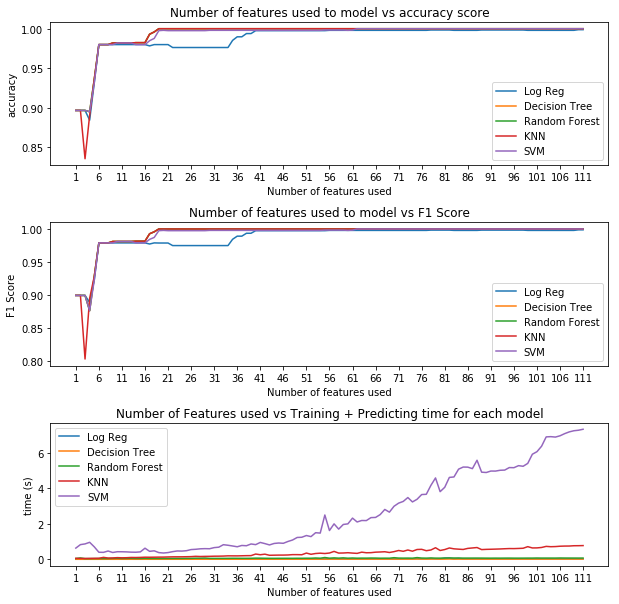

In [4]:
import matplotlib.pyplot as plt
import numpy as np


log_reg = df[df['model']=='Logistic Regression'][['features','F1 score','accuracy score','time']]
dt = df[df['model']=='Decision Tree'][['features','F1 score','accuracy score','time']]
rf = df[df['model']=='Random Forest'][['features','F1 score','accuracy score','time']]
knn = df[df['model']=='K-Nearest Neighbors'][['features','F1 score','accuracy score','time']]
svm = df[df['model']=='SVM'][['features','F1 score','accuracy score','time']]

x = df['features']
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(log_reg['features'],log_reg['accuracy score'],label='Log Reg')
plt.plot(dt['features'],dt['accuracy score'],label='Decision Tree')
plt.plot(rf['features'],rf['accuracy score'],label='Random Forest')
plt.plot(knn['features'],knn['accuracy score'],label='KNN')
plt.plot(svm['features'],svm['accuracy score'],label='SVM')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('Number of features used')
plt.title("Number of features used to model vs accuracy score")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
### F1 score plot
plt.subplot(3,1,2)
plt.plot(log_reg['features'],log_reg['F1 score'],label='Log Reg')
plt.plot(dt['features'],dt['F1 score'],label='Decision Tree')
plt.plot(rf['features'],rf['F1 score'],label='Random Forest')
plt.plot(knn['features'],knn['F1 score'],label='KNN')
plt.plot(svm['features'],svm['F1 score'],label='SVM')
plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('Number of features used')
plt.title("Number of features used to model vs F1 Score")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.subplots_adjust(hspace=0.4)
### Time
plt.subplot(3,1,3)
plt.plot(log_reg['features'],log_reg['time'],label='Log Reg')
plt.plot(dt['features'],dt['time'],label='Decision Tree')
plt.plot(rf['features'],rf['time'],label='Random Forest')
plt.plot(knn['features'],knn['time'],label='KNN')
plt.plot(svm['features'],svm['time'],label='SVM')
plt.legend()
plt.ylabel('time (s)')
plt.xlabel('Number of features used')
plt.title("Number of Features used vs Training + Predicting time for each model")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.subplots_adjust(hspace=0.4)
plt.savefig("Model_evaluation.png")
plt.show()

In [5]:
from functools import reduce

log_reg.columns = ['features']+[i+'_logreg' for i in log_reg.columns if i!='features']
svm.columns = ['features']+[i+'_svm' for i in svm.columns if i!='features']
knn.columns = ['features']+[i+'_knn' for i in knn.columns if i!='features']
rf.columns = ['features']+[i+'_rf' for i in rf.columns if i!='features']
dt.columns = ['features']+[i+'_dt' for i in dt.columns if i!='features']
dfList = [log_reg,dt,rf,knn,svm]
compiled = reduce(lambda x, y: pd.merge(x, y, on = 'features'), dfList)
F1s = [i for i in compiled.columns if 'F1' in i]
accuracies = [i for i in compiled.columns if 'accuracy' in i]
times = [i for i in compiled.columns if 'time' in i]
compiled = compiled[['features']+F1s+accuracies+times]
compiled

features  F1 score_logreg  F1 score_dt  F1 score_rf  F1 score_knn  \
0           1         0.899522     0.899522     0.899522      0.899522   
1           2         0.899522     0.899522     0.899522      0.899522   
2           3         0.899522     0.899522     0.899522      0.803335   
3           4         0.888889     0.876448     0.876448      0.895088   
4           5         0.922721     0.928177     0.928177      0.928177   
5           6         0.978943     0.978943     0.978943      0.978943   
6           7         0.978943     0.978943     0.978943      0.978943   
7           8         0.978943     0.978943     0.978943      0.978943   
8           9         0.978943     0.981132     0.981132      0.981132   
9          10         0.978943     0.981132     0.981132      0.981132   
10         11         0.978943     0.981132     0.981132      0.981132   
11         12         0.978943     0.981132     0.981132      0.981132   
12         13         0.978943     0.981132     0.981132      0.981132   
13         14         0.978943     0.981569     0.981569      0.981569   
14         15         0.978943     0.981569     0.981569      0.981569   
15         16         0.978943     0.981569     0.981569      0.981569   
16         17         0.977263     0.992751     0.992751      0.992751   
17         18         0.978943     0.995723     0.995723      0.995723   
18         19         0.978760     1.000000     1.000000      1.000000   
19         20         0.978760     1.000000     1.000000      1.000000   
20         21         0.978760     1.000000     1.000000      1.000000   
21         22         0.974892     1.000000     1.000000      1.000000   
22         23         0.974892     1.000000     1.000000      1.000000   
23         24         0.974892     1.000000     1.000000      1.000000   
24         25         0.974892     1.000000     1.000000      1.000000   
25         26         0.974892     1.000000     1.000000      1.000000   
26         27         0.974892     1.000000     1.000000      1.000000   
27         28         0.974892     1.000000     1.000000      1.000000   
28         29         0.974892     1.000000     1.000000      1.000000   
29         30         0.974892     1.000000     1.000000      1.000000   
..        ...              ...          ...          ...           ...   
81         82         0.998279     1.000000     1.000000      1.000000   
82         83         0.997848     1.000000     1.000000      1.000000   
83         84         0.997848     1.000000     1.000000      1.000000   
84         85         0.997848     1.000000     1.000000      1.000000   
85         86         0.997848     1.000000     1.000000      1.000000   
86         87         0.997848     1.000000     1.000000      1.000000   
87         88         0.997848     1.000000     1.000000      1.000000   
88         89         0.998279     1.000000     1.000000      1.000000   
89         90         0.998279     1.000000     1.000000      1.000000   
90         91         0.998279     1.000000     1.000000      1.000000   
91         92         0.998279     1.000000     1.000000      1.000000   
92         93         0.998279     1.000000     1.000000      1.000000   
93         94         0.998279     1.000000     1.000000      1.000000   
94         95         0.998279     1.000000     1.000000      1.000000   
95         96         0.998279     1.000000     1.000000      1.000000   
96         97         0.998279     1.000000     1.000000      1.000000   
97         98         0.998279     1.000000     1.000000      1.000000   
98         99         0.997848     1.000000     1.000000      1.000000   
99        100         0.997848     1.000000     1.000000      1.000000   
100       101         0.997848     1.000000     1.000000      1.000000   
101       102         0.997848     1.000000     1.000000      1.000000   
102       103         0.997848     1.000000     1.000000      1.000000   
103      

In [8]:
import numpy as np
import pandas as pd
data = pd.read_csv('prepared_data.csv').drop('Unnamed: 0',axis=1)
corr = data.corr()['class']
corr = pd.DataFrame(corr).reset_index().rename(columns={'index':'Feature','class':'Correlation with target'})
corr['absolute'] = corr['Correlation with target'].apply(lambda x:np.abs(x))
corr = corr.sort_values(by='absolute',ascending=False).reset_index().drop('index',axis=1).drop('absolute',axis=1)
corr = corr.loc[1:]
#corr.to_csv('key_features.csv')
corr = corr.reset_index().rename(columns={'index':'Rank'})

Rank                     Feature  Correlation with target
0       1                      odor_n                -0.785557
1       2                      odor_f                 0.623842
2       3  stalk-surface-above-ring_k                 0.587658
3       4  stalk-surface-below-ring_k                 0.573524
4       5                 ring-type_p                -0.540469
5       6                 gill-size_n                 0.540024
6       7                 gill-size_b                -0.540024
7       8                gill-color_b                 0.538808
8       9                   bruises_f                 0.501530
9      10                   bruises_t                -0.501530
10     11  stalk-surface-above-ring_s                -0.491314
11     12         spore-print-color_h                 0.490229
12     13                 ring-type_l                 0.451619
13     14                population_v                 0.443722
14     15  stalk-surface-below-ring_s                -0.425444
15     16         spore-print-color_n                -0.416645
16     17         spore-print-color_k                -0.396832
17     18         spore-print-color_w                 0.357384
18     19              gill-spacing_c                 0.348387
19     20              gill-spacing_w                -0.348387
20     21                   habitat_p                 0.323346
21     22                gill-color_n                -0.288943
22     23                      odor_s                 0.286360
23     24                      odor_y                 0.286360
24     25    stalk-color-above-ring_g                -0.266489
25     26    stalk-color-below-ring_g                -0.266489
26     27    stalk-color-below-ring_b                 0.245662
27     28    stalk-color-above-ring_b                 0.245662
28     29    stalk-color-above-ring_n                 0.233164
29     30                gill-color_w                -0.231316
..    ...                         ...                      ...
81     82               cap-surface_s                 0.095454
82     83               cap-surface_y                 0.088677
83     84                gill-color_o                -0.085962
84     85  stalk-surface-below-ring_y                -0.081674
85     86         spore-print-color_o                -0.074371
86     87         spore-print-color_y                -0.074371
87     88         spore-print-color_b                -0.074371
88     89         spore-print-color_u                -0.074371
89     90                 ring-type_f                -0.074371
90     91    stalk-color-above-ring_c                 0.069159
91     92                 ring-type_n                 0.069159
92     93               ring-number_n                 0.069159
93     94    stalk-color-below-ring_c                 0.069159
94     95                      odor_m                 0.069159
95     96                 cap-color_b                 0.067544
96     97                 cap-shape_s                -0.060664
97     98                gill-color_r                 0.056426
98     99    stalk-color-below-ring_y                 0.056426
99    100                gill-color_p                -0.050380
100   101                gill-color_y                -0.046828
101   102                 cap-color_g                -0.046456
102   103                 cap-color_n                -0.044360
103   104                 cap-color_u                -0.042854
104   105                 cap-color_r                -0.042854
105   106                 cap-color_p                 0.034702
106   107                veil-color_y                 0.032545
107   108    stalk-color-above-ring_y                 0.032545
108   109                 cap-color_c                -0.030910
109   110               cap-surface_g                 0.023007
110   111                 cap-shape_c                 0.023007

[111 rows x 3 columns]

In [7]:
df = corr.copy()
df = df.head(19)
#df.drop(df.columns[-1], axis=1)

# Get column names
cols = df.columns

# Create a new DataFrame with just the markdown
# strings
df2 = pd.DataFrame([['---',]*len(cols)], columns=cols)

#Create a new concatenated DataFrame
df3 = pd.concat([df2, df])

#Save as markdown
df3.to_csv("feature_rank19.md", sep="|", index=False)